<a href="https://colab.research.google.com/github/alzaidawi/PORTAL_code/blob/main/less_pore_types_pixel_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train with multiple images to predict 4 pore types:

In [12]:
## The training and test image paths
from skimage.io import imread, imshow
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import time
from google.colab.patches import cv2_imshow
import os

# train_image_path = '/content/new_cropped_001.jpg'
test_image_path = '/content/new_cropped_001.jpg'
test_input_image = cv2.imread(test_image_path)

train_features_path =  "train_pixels_features_and_lables.csv"
test_features_path =  "test_pixels_features_and_lables.csv"

test_output_labeled_image_path = '/content/labeled_test_img.jpg'

# Function to extract the pixel features

In [13]:
def extract_pixel_features(input_image):
  #load the image
  img_org = input_image  ## incase I train with multi images

  print('orginal image')
  print('img.shape',img_org.shape)
  cv2_imshow(img_org)

  # convert the image to gray scal
  img = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
  print('gray image')
  print('gray image.shape',img.shape)
  cv2_imshow(img)

  # plt.imshow(img)
  # plt.axis('off')
  # plt.show()
  #Here, if we have multichannel image then extract the right channel instead of converting the image to grey.
  #For example, if DAPI contains nuclei information, extract the DAPI channel image first.
  #Multiple images can be used for training. For that, we need to concatenate the data
  #Save original image pixels into a data frame. This is our Feature #1.

  img2 = img.reshape(-1) ## reshape the image into single column
  print('img converted to one column',img2.shape)
  df = pd.DataFrame()
  t0 = time.time()   ## starting time

  df['Original Image'] = img2

  # #Generate Gabor features
  # num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
  # kernels = []
  # for theta in range(2):   #Define number of thetas
  #     theta = theta / 4. * np.pi
  #     for sigma in (1, 3):  #Sigma with 1 and 3
  #         for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
  #             for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5


  #                 gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
  # #                print(gabor_label)
  #                 ksize=3  # we can use 9 if the image big size
  #                 kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
  #                 kernels.append(kernel)
  #                 #Now filter the image and add values to a new column
  #                 fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
  #                 filtered_img = fimg.reshape(-1)
  #                 df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
  #                 print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
  #                 num += 1  #Increment for gabor column label

  ########################################
  #Gerate OTHER FEATURES out of pixels and add them to the data frame

  #CANNY EDGE
  edges = cv2.Canny(img, 100,200)   #Image, min and max values
  edges1 = edges.reshape(-1)
  df['Canny Edge'] = edges1 #Add column to original dataframe

  from skimage.filters import roberts, sobel, scharr, prewitt

  #ROBERTS EDGE
  edge_roberts = roberts(img)
  edge_roberts1 = edge_roberts.reshape(-1)
  df['Roberts'] = edge_roberts1

  #SOBEL
  edge_sobel = sobel(img)
  edge_sobel1 = edge_sobel.reshape(-1)
  df['Sobel'] = edge_sobel1

  #SCHARR
  edge_scharr = scharr(img)
  edge_scharr1 = edge_scharr.reshape(-1)
  df['Scharr'] = edge_scharr1

  #PREWITT
  edge_prewitt = prewitt(img)
  edge_prewitt1 = edge_prewitt.reshape(-1)
  df['Prewitt'] = edge_prewitt1

  Kernal_size = 3

  #GAUSSIAN with sigma=3
  from scipy import ndimage as nd
  gaussian_img = nd.gaussian_filter(img, sigma=5)
  gaussian_img1 = gaussian_img.reshape(-1)
  df['Gaussian s3'] = gaussian_img1

  #GAUSSIAN with sigma=7
  gaussian_img2 = nd.gaussian_filter(img, sigma=7)
  gaussian_img3 = gaussian_img2.reshape(-1)
  df['Gaussian s7'] = gaussian_img3

  #MEDIAN with sigma=3
  median_img = nd.median_filter(img, size=Kernal_size)
  median_img1 = median_img.reshape(-1)
  df['Median s3'] = median_img1

  #VARIANCE with size=3
  variance_img = nd.generic_filter(img, np.var, size=Kernal_size)
  variance_img1 = variance_img.reshape(-1)
  df['Variance s3'] = variance_img1  #Add column to original dataframe

  feat_ext_time = time.time()-t0
  local_time_feature_rxtraction = time.localtime(feat_ext_time)

  # show some pf the feature images
  import matplotlib.pyplot as plt
  fig, axes = plt.subplots(1, 5, figsize=(10,10))
  print('input image',img.shape)
  print('gray image',img2.shape)

  axes[0].imshow(np.asanyarray(df['Original Image']).reshape(img.shape), cmap=plt.cm.gray)
  axes[1].imshow(np.asanyarray(df['Canny Edge']).reshape(img.shape), cmap=plt.cm.gray)
  axes[2].imshow(np.asanyarray(df['Roberts']).reshape(img.shape), cmap=plt.cm.gray)
  axes[3].imshow(np.asanyarray(df['Sobel']).reshape(img.shape), cmap=plt.cm.gray)
  axes[4].imshow(np.asanyarray(df['Scharr']).reshape(img.shape), cmap=plt.cm.gray)

  # show some pf the feature images
  fig, axes = plt.subplots(1, 5, figsize=(10,10))

  axes[0].imshow(np.asanyarray(df['Prewitt']).reshape(img.shape), cmap=plt.cm.gray)
  axes[1].imshow(np.asanyarray(df['Gaussian s3']).reshape(img.shape), cmap=plt.cm.gray)
  axes[2].imshow(np.asanyarray(df['Gaussian s7']).reshape(img.shape), cmap=plt.cm.gray)
  axes[3].imshow(np.asanyarray(df['Median s3']).reshape(img.shape), cmap=plt.cm.gray)
  axes[4].imshow(np.asanyarray(df['Variance s3']).reshape(img.shape), cmap=plt.cm.gray)

  return img, img_org, df


# output (pore shapes) labels and create a mask

In [14]:
def label_image(img,img_org, output_labeled_image_path, features_csv, df):
  # Threshold the image to obtain binary image
  ## https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html

  ret, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)   ## check from here
  # Find contours in the binary image
  print('the binary image')
  print('binary shape', binary.shape)
  cv2_imshow(binary)

  contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  # print("hierarchy", hierarchy)

  print('len main contours', len(contours))
  max_cnt = max(contours, key = cv2.contourArea)

  # ######################### new code
  max_area = cv2.contourArea(max_cnt)
  cnt_area_list = []
  convexity_all_pores=[]
  for f, contour in enumerate(contours):
      cnt_rect = cv2.minAreaRect(contour)
      cnt_area = cv2.contourArea(contour)
      cnt_area_list.append(cnt_area)
  # ############### new to calculate convexity
  #     if cnt_area != 0 and cnt_area != max_area:
  #       hull_a = cv2.convexHull(contour)
  #       # Calculate the convexity of the contour
  #       hull_area = cv2.contourArea(hull_a)
  #       convexity = hull_area / cnt_area
  #       solidity = float(cnt_area)/hull_area
  #       convexity_all_pores.append(convexity)

  # print('convexity calculation')
  # convexity_mean = np.mean(convexity_all_pores)
  # convexity_std = np.std(convexity_all_pores)
  # convexity_mean_minus_sd = convexity_mean - 3*convexity_std
  # convexity_mean_plus_sd = convexity_mean + 3*convexity_std
  # print('max_convexity',np.max(convexity_all_pores))
  # print('min_convexity',np.min(convexity_all_pores))
  # print('median_convexity',np.median(convexity_all_pores))
  # print('mean_convexity',convexity_mean)
  # print('std_convexity',convexity_std)
  # print('convexity_mean_minus_sd',convexity_mean_minus_sd)
  # print('convexity_mean_plus_sd',convexity_mean_plus_sd)
  # ######################
  print('cnt_area_list',cnt_area_list)
  area_list = [item for item in cnt_area_list if item < max_area]
  area_list_1 = [item for item in area_list if item > 0]
  median_area = np.median(area_list_1)

  ## sort the area then take the smallest 30% of the contures to find the process pores:
  # sorted_area_list_1 = np.sort(area_list_1)
  # print('length sorted_area_list_1',len(sorted_area_list_1))
  # twenty_persent_list=int((len(sorted_area_list_1))*0.3)
  # print('sorted_area_list_1',twenty_persent_list)
  # twenty_persent_of_area_list = sorted_area_list_1[:twenty_persent_list]
  # print('twenty_persent_of_area_list',twenty_persent_of_area_list)
  # sorted_list_median_area_2 = np.median(twenty_persent_of_area_list)
  # sorted_list_mean_area_2 = np.mean(twenty_persent_of_area_list)
  # sorted_list_std_area_2 = np.std(twenty_persent_of_area_list)
  # sorted_list_mean_minus_sd = sorted_list_mean_area_2 - 3*sorted_list_std_area_2
  # sorted_list_mean_plus_sd = sorted_list_mean_area_2 + 3*sorted_list_std_area_2
  # print('sorted_list_max_area_2',np.max(twenty_persent_of_area_list))
  # print('sorted_list_min_area_2',np.min(twenty_persent_of_area_list))
  # print('sorted_list_median_area_2',sorted_list_median_area_2)
  # print('sorted_list_mean_area_2',sorted_list_mean_area_2)
  # print('sorted_list_std_area_2',sorted_list_std_area_2)
  # print('sorted_list_mean_minus_sd',sorted_list_mean_minus_sd)
  # print('sorted_list_mean_plus_sd',sorted_list_mean_plus_sd)
  # print('count_process_pores sorted list',len(twenty_persent_of_area_list))

  area_list_2 = [item for item in area_list_1 if item < median_area]
  print('area after take the second median', area_list_2)
  median_area_2 = np.median(area_list_2)
  mean_area_2 = np.mean(area_list_2)
  std_area_2 = np.std(area_list_2)
  mean_minus_sd = mean_area_2 - 3*std_area_2
  area_mean_plus_sd = mean_area_2 + 3*std_area_2
  print('max_area_2',np.max(area_list_2))
  print('min_area_2',np.min(area_list_2))
  print('median_area_2',median_area_2)
  print('mean_area_2',mean_area_2)
  print('std_area_2',std_area_2)
  print('mean_minus_sd',mean_minus_sd)
  print('area_mean_plus_sd',area_mean_plus_sd)
  print('count_process_pores',len(area_list_2))
  ######################### new code
  # Create an empty binary mask for each contour
  masks = [np.zeros(binary.shape, dtype=np.uint8) for _ in contours]
  count_no_child = []
  count_with_child = []
  # Loop through each contour
  covexity_process_pore=[]  #new
  covexity_gas_pore=[]  #new
  covexity_crack_pore=[]  #new
  covexity_LOF_pore=[]  #new
  covexity_unmelted_pore=[]  #new

  solidity_process_pore=[]  #new
  solidity_gas_pore=[]  #new
  solidity_crack_pore=[]  #new
  solidity_LOF_pore=[]  #new
  solidity_unmelted_pore=[]  #new

  for i, cnt in enumerate(contours):
      rect = cv2.minAreaRect(cnt)
      area = cv2.contourArea(cnt)
      ## hierarchy[0][i][j] means iterating through ith row (contour) and j in [0,1,2,3] = [Next, Previous, Child, Parent]
      if area != max_area and area > 2: # if the current contour area is not equal to workpiece area
        #print('len main contours without max and min area', len(contours))
        if hierarchy[0][i][2] == -1 and hierarchy[0][i][3] == 0: # Check if the contour has no child and the parent is the maximum contour=0
          count_no_child.append(1)
          (cx, cy), (w, h), angle = rect # No conversion required in the aspect ratio the unit divided
          aspect_ratio = max(w, h) / min(w, h)
          #print("aspect ratio", aspect_ratio)
          perimeter = cv2.arcLength(cnt, True)
          pore_circularities = 4 * np.pi * (area / (perimeter * perimeter))
          #print("pore_circularities", pore_circularities)
          ############### new
          hull_a = cv2.convexHull(cnt)
          # Calculate the convexity of the contour
          hull_area = cv2.contourArea(hull_a)
          convexity = hull_area / area
          solidity = float(area)/hull_area

          convexity_all_pores.append(convexity)
          ############### new
          # Get the type of the contour
          # print("i = ", i)
          if area > 0 and area < area_mean_plus_sd: # check by ploting which is having high %: 1sigma %, 2sgma %, 3sigma %
            covexity_process_pore.append(convexity) # new
            solidity_process_pore.append(solidity) # new
            annotation = 1 # process pore red color
            # print("Red i = ", i)
          elif (pore_circularities >=  0.80 and area > area_mean_plus_sd) or (convexity > 0.99 and convexity < 1.06):
            annotation = 2 ## Gas pore (circle) green color
            covexity_gas_pore.append(convexity) # new
            solidity_gas_pore.append(solidity) # new
          elif aspect_ratio >= 3.5 and pore_circularities < 0.35 and convexity < 0.35:
            annotation = 3 ## (1) crack pore (line) yellow color
            covexity_crack_pore.append(convexity) # new
            solidity_crack_pore.append(solidity) # new
          else:
            annotation = 4   ## blue color  (LOF pores)
          covexity_LOF_pore.append(convexity) # new
          solidity_LOF_pore.append(solidity) # new
        else: # Check if the contour is a pore (with child contours)
            count_with_child.append(1)
            annotation = 4   ## blue color  (LOF pores)

        # Fill the mask with the annotation value
        cv2.drawContours(masks[i], [cnt], 0, annotation, -1)
        cv2.drawContours(masks[i], [cnt], 0, 0, 1)  # Add class 0 label (black border),  last parameter is the thickness of the contour crack (line) to be drawn
  print('all pores convexity',convexity_all_pores)
  ################## new
  # pore_type = covexity_unmelted_pore  ## do not forget to change this variable to the pore type you want
  print('************ covexity statistics for each pore type *********************')

  # print('max_covexity =',round(np.max(pore_type),3))
  # print('min_covexity =',round(np.min(pore_type),3))
  # print('median_covexity =',round(np.median(pore_type),3))
  # print('mean_covexity =',round(np.mean(pore_type),3))
  # print('std_covexity =',round(np.std(pore_type),3))
  # print('count_pores =',len(pore_type))
  # convexity_mean_minus_sd = (np.mean(pore_type)) - 3*np.std(pore_type)
  # convexity_mean_plus_sd = (np.mean(pore_type)) + 3*np.std(pore_type)
  # print('convexity_mean_minus_sd =',round(convexity_mean_minus_sd,3))
  # print('convexity_mean_plus_sd =',round(convexity_mean_plus_sd,3))
  print('************ covexity statistics for each pore type *********************')

  print('************ solidity statistics for each pore type *********************')
  # pore_type = solidity_unmelted_pore  ## do not forget to change this variable to the pore type you want
  # print('max_solidity =',round(np.max(pore_type),3))
  # print('min_solidity =',round(np.min(pore_type),3))
  # print('median_solidity =',round(np.median(pore_type),3))
  # print('mean_solidity =',round(np.mean(pore_type),3))
  # print('std_solidity =',round(np.std(pore_type),3))
  # print('count_pores =',len(pore_type))
  # solidity_mean_minus_sd = (np.mean(pore_type)) - 3*np.std(pore_type)
  # solidity_mean_plus_sd = (np.mean(pore_type)) + 3*np.std(pore_type)
  # print('solidity_mean_minus_sd =',round(solidity_mean_minus_sd,3))
  # print('solidity_mean_plus_sd =',round(solidity_mean_plus_sd,3))
  print('************ solidity statistics for each pore type *********************')
  ################## new
  print('count the contour without child', len(count_no_child))
  print('count the contour with child', len(count_with_child))
  # Combine all masks to create the final annotation image
  annotation = np.zeros(binary.shape, dtype=np.uint8)
  for mask in masks:
    annotation[mask > 0] = mask[mask > 0]

  # Color the pixels belonging to each contour  RGB=red,green,blue
  colors = {1: (255, 0, 0), 2: (0, 255, 0), 3: (255, 255, 0), 4: (0, 0, 255)}
  annotated_img = np.zeros_like(img_org)  ## img_org from features extraction function

  for annotation_value, color in colors.items():
    pixels_of_certain_type = np.argwhere(annotation == annotation_value)
    for x,y in pixels_of_certain_type:
      annotated_img[x, y] = np.array(color)

  # Show the final annotated image
  print('the annotated image')
  print('annotated_img shape', annotated_img.shape)
  #cv2_imshow(annotated_img)
  plt.imsave(output_labeled_image_path, annotated_img)


  plt.imshow(annotated_img)
  plt.axis('off')
  plt.show()

  # Add the labels variable then save the features and labels into csv file
  print('******* Add the labels variable then save the features and labels into csv file *******')
  labeled_img1 = annotation.reshape(-1) ### here is the change
  print('labeled_img1 shape', labeled_img1.shape)
  print('annotation shape', annotation.shape)

  df['Labels'] = labeled_img1
  #####################################
  print('the unique labels', df['Labels'].unique())
  print('the count of the unique labels', df['Labels'].value_counts())

  #df.to_csv("before_removing_pixels_pixels_features_and_lables.csv")
  #df = df[df['Labels'] != 0] ## to remove the pixels of the background which not represensetive to our objects
  ###print(df.head())
  df.to_csv(features_csv)

  return df

# Loop throug multiple images for train

image_dir /content/train_images
image_file .ipynb_checkpoints
image_file 001.JPG


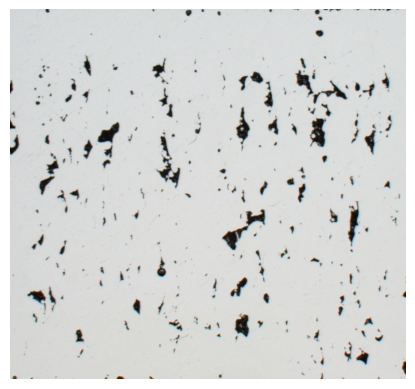

orginal image
img.shape (990, 1060, 3)


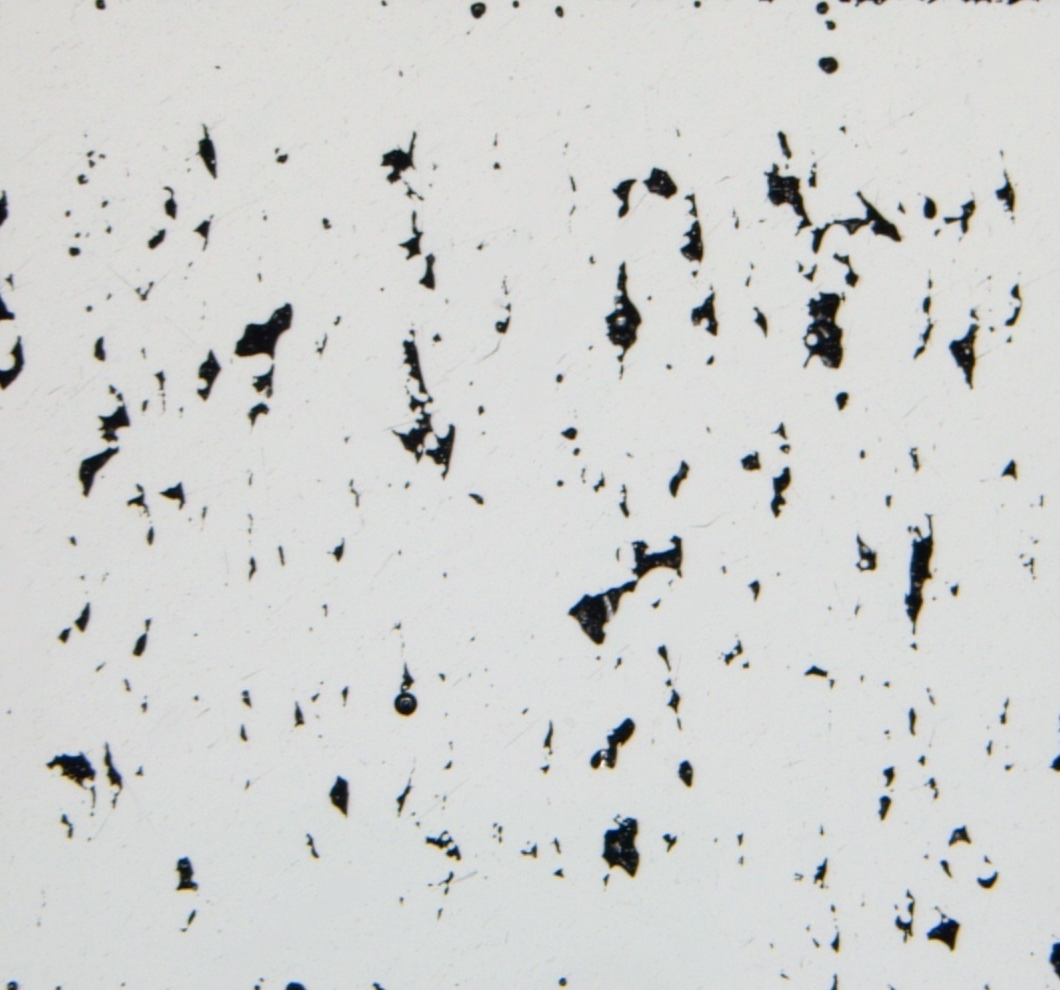

gray image
gray image.shape (990, 1060)


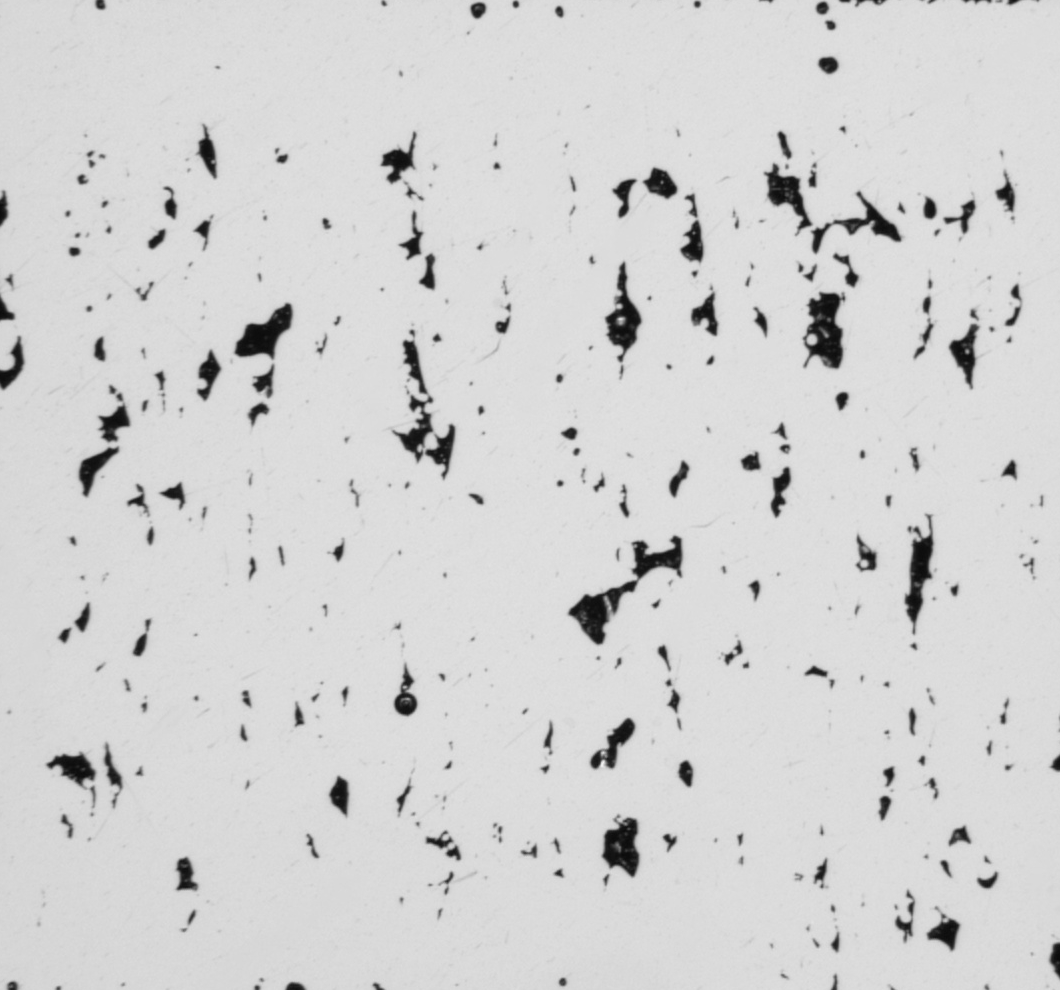

img converted to one column (1049400,)
input image (990, 1060)
gray image (1049400,)
train_img.shape (990, 1060)
train_img [[213 214 215 ... 214 214 216]
 [213 213 215 ... 215 216 216]
 [211 211 214 ... 216 216 214]
 ...
 [214 212 211 ... 215 213 215]
 [211 210 209 ... 216 214 215]
 [209 209 208 ... 215 214 215]]
train_img_org.shape (990, 1060, 3)
train_img_org [[[211 213 214]
  [212 214 215]
  [211 216 215]
  ...
  [212 214 214]
  [209 216 213]
  [211 217 216]]

 [[211 213 214]
  [211 213 214]
  [211 216 215]
  ...
  [213 215 216]
  [214 216 217]
  [212 216 217]]

 [[209 211 212]
  [209 211 211]
  [210 215 214]
  ...
  [216 215 217]
  [214 215 219]
  [212 213 217]]

 ...

 [[210 215 213]
  [208 213 212]
  [206 211 212]
  ...
  [211 216 214]
  [208 215 212]
  [211 216 214]]

 [[207 212 210]
  [205 211 210]
  [202 210 210]
  ...
  [214 217 215]
  [210 215 213]
  [211 216 214]]

 [[205 211 206]
  [204 211 208]
  [199 209 209]
  ...
  [215 216 214]
  [212 215 213]
  [213 217 212]]]
train_

<ipython-input-15-da8ad2deb1ce>:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  images_dataset = images_dataset.append(train_df)  ### appending the features of all the images


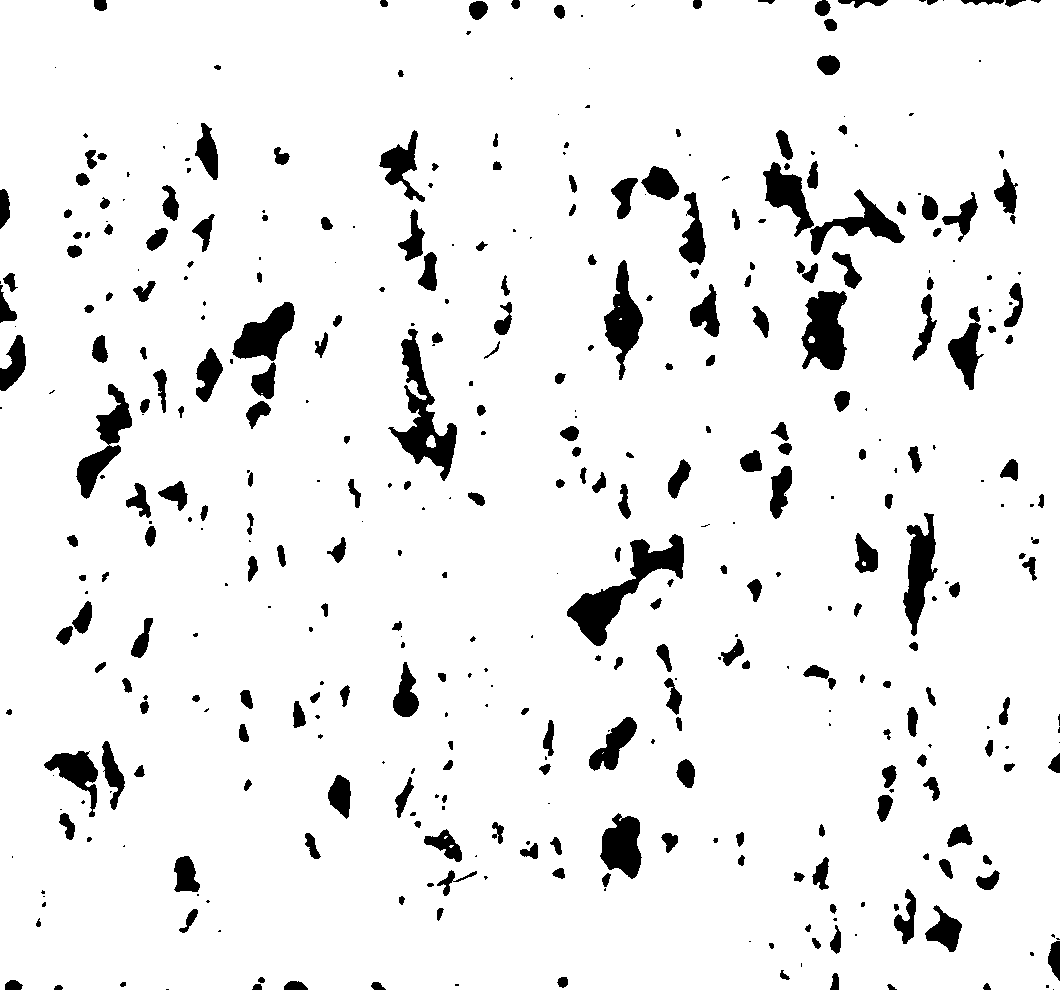

len main contours 411
cnt_area_list [1043541.5, 14.0, 13.0, 32.0, 108.0, 42.0, 66.5, 8.0, 20.0, 32.0, 4.0, 74.0, 15.0, 7.0, 8.5, 220.5, 41.5, 15.0, 39.0, 199.5, 72.5, 929.0, 38.5, 59.5, 25.0, 22.5, 12.0, 49.5, 4.0, 7.0, 16.5, 645.0, 8.5, 31.0, 15.0, 93.0, 90.0, 88.0, 305.0, 218.5, 113.0, 189.5, 369.5, 722.5, 4.0, 74.0, 65.5, 5.5, 40.0, 5.5, 195.5, 18.5, 27.5, 138.5, 27.0, 27.5, 229.5, 241.0, 100.5, 647.0, 5.0, 3.5, 403.5, 69.5, 152.0, 44.5, 1965.0, 273.5, 27.5, 4.0, 18.0, 4.0, 14.5, 324.5, 39.5, 17.5, 5.5, 20.0, 68.5, 226.0, 340.0, 727.5, 2.0, 2.0, 23.0, 254.5, 101.0, 93.0, 80.0, 8.0, 79.0, 422.0, 11.5, 97.5, 2.0, 1501.5, 13.5, 13.5, 45.0, 795.5, 114.5, 20.0, 22.5, 5.5, 60.5, 11.0, 156.0, 8.5, 285.5, 80.0, 1241.0, 0.0, 19.5, 17.5, 7.0, 35.5, 48.0, 15.5, 267.5, 11.0, 271.0, 101.0, 204.5, 52.5, 23.5, 81.0, 192.0, 114.5, 7.0, 153.0, 57.0, 18.5, 80.0, 7.0, 369.5, 113.0, 41.5, 18.5, 70.0, 16.0, 8.5, 258.5, 892.5, 79.0, 67.0, 12.5, 85.5, 34.5, 256.0, 70.0, 27.5, 316.0, 0.0, 28.0, 2.0, 8.5, 1

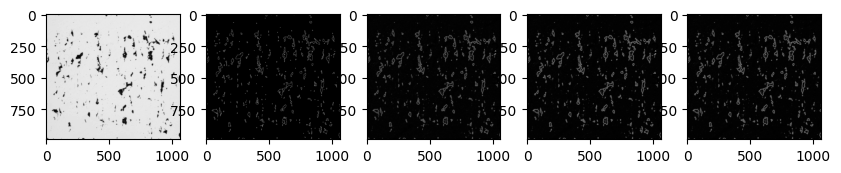

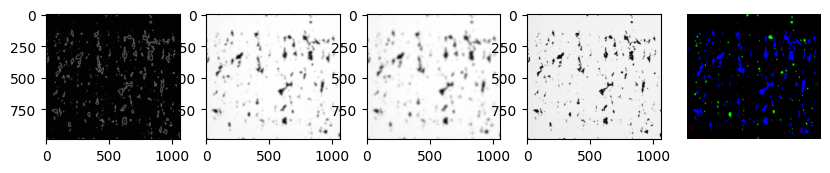

******* Add the labels variable then save the features and labels into csv file *******
labeled_img1 shape (1049400,)
annotation shape (990, 1060)
the unique labels [0 2 1 4]
the count of the unique labels 0    979461
4     58541
2      8621
1      2777
Name: Labels, dtype: int64
len x 1049400


In [15]:
## in case we have multi images for train:

# Directory containing the images
image_dir = "/content/train_images"
print('image_dir',image_dir)

# New directory for saving results
output_dir = "/content/labeled_train_result_images"
os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist

images_dataset = pd.DataFrame()

# Loop over the files in the directory
for image_file in os.listdir(image_dir):
  print('image_file',image_file)
  if image_file != '.ipynb_checkpoints':
    # Load the image
    img = cv2.imread(os.path.join(image_dir, image_file))

    input_image = img[:, 430:1490]  ## croped image used with only our data images   img.shape (1080, 1060, 3)
    input_image = input_image[45:1035,:]  ## croped image used with only our data images  img.shape (990, 1060, 3)

    # # Crop the image
    # x_start = 300
    # y_start = 0
    # width = 1300
    # height = 1080
    # input_image = img[y_start:y_start + height, x_start:x_start + width]

    plt.imshow(input_image)
    plt.axis('off')
    plt.show()

    train_img, train_img_org, train_df = extract_pixel_features(input_image)
    print('train_img.shape',train_img.shape)
    print('train_img_org.shape',train_img_org.shape)
    print('train_df.shape',train_df.shape)

    ######################################
    #Update dataframe for images to include details for each image in the loop
    train_df = pd.DataFrame(train_df)
    images_dataset = images_dataset.append(train_df)  ### appending the features of all the images
    print('images_dataset.shape',images_dataset.shape)
    print('images_dataset',images_dataset)

    train_output_labeled_image_path ='{}/labeled_train_image_{}'.format(output_dir,image_file)

    train_df = label_image(train_img, train_img_org, train_output_labeled_image_path,train_features_path, images_dataset)
    ##label_image(train_img, train_img_org, train_output_labeled_image_path,train_features_path, train_df)

y = train_df["Labels"].values
#Define the independent variables
X = train_df.drop(labels = ["Labels"], axis=1)
print('len x', len(X))


In [38]:
#############################################################################
# Handling Imbalanced data
###########################################
def balanced_classes(df):
  print('Technique of Up-sample minority class and Down-sample the majority class')
  print('using the same number of the pixels in Ellipse class==3 for all other classes')
  from sklearn.utils import resample
  print('Label counts of all the classes in the test image', df['Labels'].value_counts())
  count_all_classes = df['Labels'].value_counts()
  #ellipse_class_count = count_all_classes[3]
  #background_class_count = int((count_all_classes[0]) / 2)  # if i want  to match average class count of samples
  # count_df_LOF=df[df['Labels'] == 4].value_counts()


  #Separate majority and minority classes
  df_background = df.loc[df['Labels'].isin([0])]
  df_processed = df[df['Labels'] == 1]  # processed pore (red)
  df_Gas = df[df['Labels'] == 2] # Gas pore (green)
  #df_crack = df[df['Labels'] == 3] # crack pore (yellow)
  df_LOF = df[df['Labels'] == 4] # LOF pore (blue)

  # df_background_resampled = resample(df_background,
  #                                 replace=True,     # sample with replacement
  #                                 n_samples=60000,
  #                                 random_state=42) # reproducible results
  # df_processed_resampled = resample(df_processed,
  #                                 replace=True,
  #                                 n_samples=10000,
  #                                 random_state=42)
  df_Gas_resampled = resample(df_Gas,
                                  replace=True,
                                  n_samples=5000,
                                  random_state=42)
  # df_crack_resampled = resample(df_crack,
  #                                 replace=True,
  #                                 n_samples=60000,
  #                                 random_state=42)
  df_LOF_resampled = resample(df_LOF,
                                  replace=True,
                                  n_samples=60000,
                                  random_state=42)

  # Combine majority class with upsampled minority class
  df_upsampled = pd.concat([df_background, df_processed, df_Gas_resampled, df_LOF_resampled])
#  df_upsampled = pd.concat([df_background_resampled, df_processed_resampled, df_Gas_resampled, df_crack_resampled, df_keyhole_resampled, df_LOF_resampled, df_un_melted_resampled])
  print('The classes after up/down sampling:')
  print(df_upsampled['Labels'].value_counts())

  #Define the target
  Y_upsampled = df_upsampled["Labels"].values
  #Define the independent variables
  X_upsampled = df_upsampled.drop(labels = ["Labels"], axis=1)

  return X_upsampled, Y_upsampled

In [10]:
# to train with the balanced classes

X, y = balanced_classes(train_df)

NameError: ignored

# import the classifiers

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils import class_weight


##https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# names = ["Nearest Neighbors", "Linear SVM","RBF SVM","Decision Tree","Random Forest","Neural Net","AdaBoost","Naive Bayes", "QDA"]
# ##,"Gaussian Process"
# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025, max_iter=100, random_state=42),
#     SVC(gamma=2, C=1, max_iter=100, random_state=42),
#     #GaussianProcessClassifier(1.0 * RBF(1.0),random_state = 42),
#     DecisionTreeClassifier(max_depth=5, random_state = 42),
#     RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1, random_state = 42),
#     MLPClassifier(alpha=1, max_iter=1000, random_state = 42),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
# ]
## , random_state=42

# names = ["Linear_SVM","RBF_SVM","Decision_Tree","Random_Forest","Neural_Net","Naive_Bayes"]
# ##,"Gaussian Process"
# classifiers = [
#     SVC(kernel="linear", C=0.025, max_iter=100, random_state=42),
#     SVC(gamma=2, C=1, max_iter=100, random_state=42),
#     DecisionTreeClassifier(max_depth=5, random_state = 42),
#     RandomForestClassifier(max_depth=10, n_estimators=200, max_features=5, random_state = 42),
#     MLPClassifier(alpha=1, max_iter=1000, random_state = 42),
#     GaussianNB(),
# ]


# # Calculate class weights automatically
# class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y), y=y)
# print('class_weights',class_weights)

names = ["Random Forest"]
# ##,"Gaussian Process"
# classifiers = [
#     RandomForestClassifier(max_depth=10, class_weight=dict(enumerate(class_weights)), n_estimators=200, max_features=5, random_state = 42)
# ]

# with class weight balanced
classifiers = [
    RandomForestClassifier(max_depth=10, n_estimators=200, max_features=5, random_state = 42, class_weight='balanced')
]

# classifiers = [
#     RandomForestClassifier(max_depth=10, n_estimators=200, max_features=5, random_state = 42)
# ]

# Train model with all the image data

name: Random Forest
prediction_train results [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
X_train.shape (1049400, 10)
prediction_train.shape (1049400,)
type of prediction_train <class 'numpy.ndarray'>
Random Forest  CLF: Train time = H:M:S 0 : 4 : 53
Accuracy on training data =  98.467 %
Confusion Matrix [[975762    109    808   2782]
 [     0   2748     23      6]
 [     0    188   4938   3495]
 [     6   1267   7406  49862]]


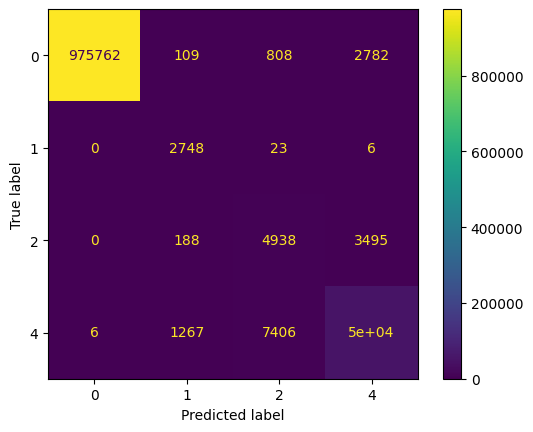

Label  0  accuracy =  0.9962234330922823
Label  1  accuracy =  0.9895570759812747
Label  2  accuracy =  0.5727873796543325
Label  4  accuracy =  0.8517449309031278
train_img.shape for segmented (990, 1060)
img_org.shape for predicted image (990, 1060, 3)
annotation_value 1
annotation_value 2
annotation_value 3
annotation_value 4
predicted_img shape (990, 1060, 3)


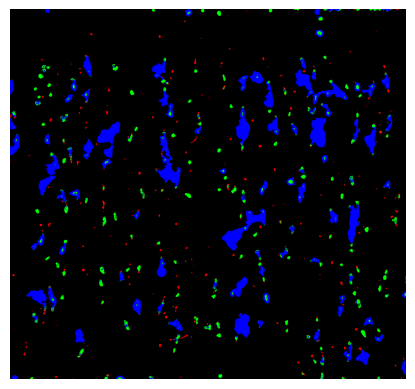

In [17]:

start_train_time = time.time()
for name, model in zip(names, classifiers):
  print('name:', name)

  # Train the model on training data
  model.fit(X, y)

  train_time = time.time()-start_train_time
  local_train_time = time.localtime(train_time)

  # verify number of trees used. If not defined above.
  #print('Number of Trees used : ', model.n_estimators)

  #STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA AND CALCULATE THE ACCURACY SCORE
  #First test prediction on the training data itself. SHould be good.
  prediction_train = model.predict(X)
  print("prediction_train results", prediction_train[:250])
  print('X_train.shape',X.shape)
  print('prediction_train.shape',prediction_train.shape)
  ##print('train_img.shape',train_img.shape)
  print('type of prediction_train', type(prediction_train))

  #print(name, ' CLF: Feature extraction time = H:M:S', local_time_feature_rxtraction.tm_hour,':',local_time_feature_rxtraction.tm_min,':',local_time_feature_rxtraction.tm_sec)
  print(name, ' CLF: Train time = H:M:S', local_train_time.tm_hour,':',local_train_time.tm_min,':',local_train_time.tm_sec)

  #total_time = feat_ext_time+train_time
  #total_time = time.localtime(total_time)
  #print(name, ' CLF: Total time = H:M:S', total_time.tm_hour,':',total_time.tm_min,':',total_time.tm_sec)

  #prediction_prob_test = model.predict_proba(X_test)

  #Let us check the accuracy on test data
  from sklearn import metrics

  #First check the accuracy on training data. This will be higher than test data prediction accuracy.
  train_acc = metrics.accuracy_score(y, prediction_train)*100
  print ("Accuracy on training data = ", round(train_acc,3), '%')

  #This part commented out for SVM testing. Uncomment for random forest.
  #One amazing feature of Random forest is that it provides us info on feature importances
  #Get numerical feature importances importances = list(model.feature_importances_)

  # feature_list = list(X.columns)
  # feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
  # print('The scors or important features',feature_imp)
  # feature_imp.to_csv("important_features.csv")
  #####################################
    #Confusion Matrix
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  from sklearn import metrics
  confusion_matrix = metrics.confusion_matrix(y, prediction_train)
  print('Confusion Matrix',confusion_matrix)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
  cm_display.plot()
  plt.show()

  #Print individual accuracy values for each class, based on the confusion matrix
  ind_class_acc = confusion_matrix.diagonal()/confusion_matrix.sum(axis=1)
  for i in range(len(model.classes_)):
    print("Label ", model.classes_[i], " accuracy = ", ind_class_acc[i])
  #####################
  import pickle
  #Save the trained model as pickle string to disk for future use
  CLF_res = "/content/CLF_res"
  os.makedirs(CLF_res, exist_ok=True)  # Create the output directory if it doesn't exist
  filename = "{}/{}_trained".format(CLF_res, name)
  pickle.dump(model, open(filename, 'wb'))

  print('train_img.shape for segmented',train_img.shape)
  print('img_org.shape for predicted image',train_img_org.shape)

  # # Color the pixels belonging to each contour
  colors = {1: (255, 0, 0), 2: (0, 255, 0), 3: (255, 255, 0), 4: (0, 0, 255)}
  segmented = prediction_train.reshape((train_img.shape))

  predicted_img_train = np.zeros_like(train_img_org)

  for annotation_value, color in colors.items():
    print('annotation_value',annotation_value)
    pixels_of_certain_type = np.argwhere(segmented == annotation_value)
    #print('pixels_of_certain_type',pixels_of_certain_type)
    for x,y in pixels_of_certain_type:
      predicted_img_train[x, y] = np.array(color)

  plt.imshow(predicted_img_train)
  plt.axis('off')
  #cv2_imshow(predicted_img)
  print('predicted_img shape', predicted_img_train.shape)
  # New directory for saving results
  output_dir = "/content/predicted_images"
  os.makedirs(output_dir, exist_ok=True)  # Create the output directory if it doesn't exist
  plt.imsave('{}/predicted_train_image_{}.jpg'.format(output_dir,name), predicted_img_train)


# **Predict using new images with the saved models**

orginal image
img.shape (642, 503, 3)


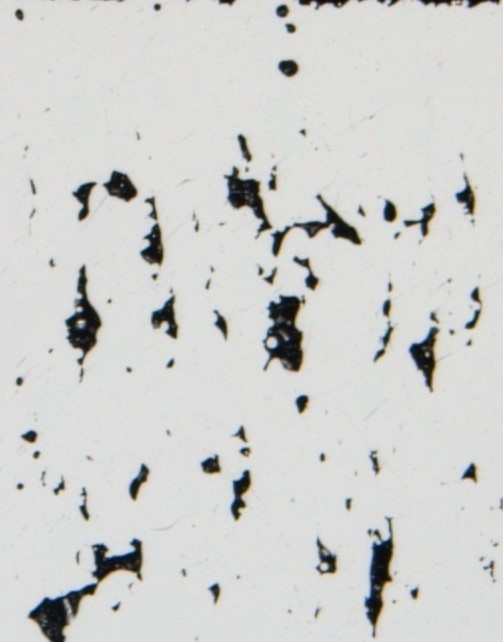

gray image
gray image.shape (642, 503)


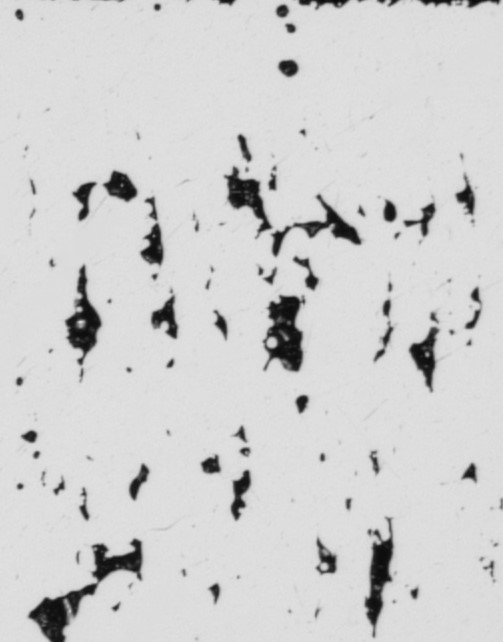

img converted to one column (322926,)
input image (642, 503)
gray image (322926,)


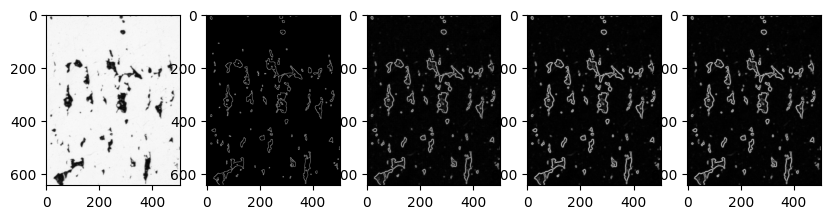

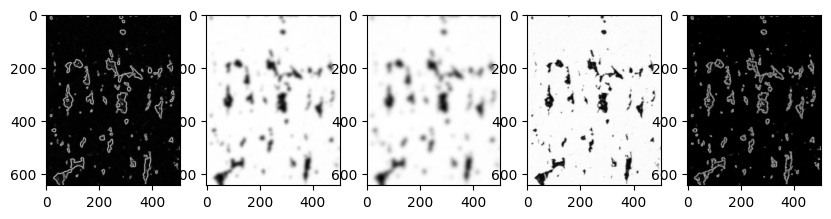

In [18]:
test_img, test_img_org, test_df = extract_pixel_features(test_input_image)

the binary image
binary shape (642, 503)


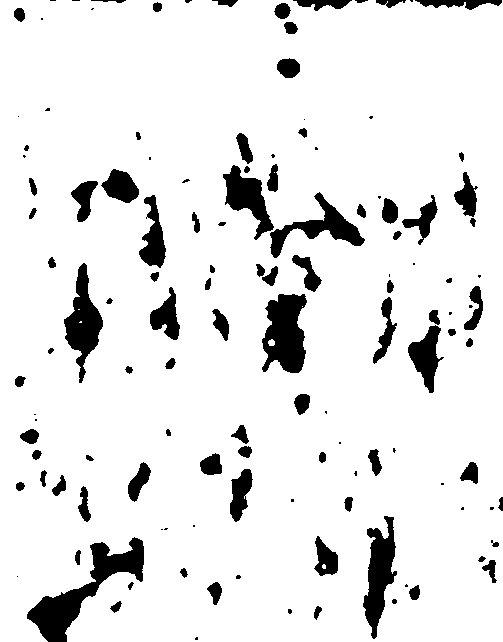

len main contours 126
cnt_area_list [316747.0, 12.5, 23.5, 80.0, 90.0, 28.0, 138.0, 11.0, 229.0, 36.0, 2.0, 23.5, 59.5, 188.0, 38.5, 80.5, 35.5, 10.0, 647.0, 10.5, 4.0, 10.0, 7.0, 2291.5, 16.5, 12.5, 14.0, 111.5, 292.0, 10.0, 73.5, 177.5, 17.0, 89.0, 797.0, 288.0, 499.5, 41.5, 393.5, 76.0, 82.5, 249.0, 15.5, 139.0, 7.0, 37.0, 222.0, 196.5, 7.0, 4.0, 8.5, 271.5, 102.5, 51.5, 92.5, 32.5, 59.0, 56.0, 1260.5, 12.5, 135.5, 332.5, 15.0, 35.0, 643.5, 2751.5, 29.0, 0.0, 894.5, 459.0, 82.5, 32.0, 69.0, 11.0, 6.0, 72.0, 188.0, 41.5, 92.5, 7.0, 2212.0, 1.5, 0.0, 75.5, 500.5, 63.5, 33.5, 46.5, 4.0, 125.5, 62.0, 101.0, 344.5, 11.0, 669.0, 1116.5, 1908.5, 629.5, 25.0, 106.0, 617.0, 866.0, 39.5, 1727.0, 252.5, 0.0, 10.0, 9.5, 16.0, 44.5, 12.5, 29.5, 328.5, 41.0, 69.5, 2.0, 13.5, 2.0, 18.0, 384.0, 148.0, 7.0, 7.0, 135.0, 218.5, 86.0]
area after take the second median [12.5, 23.5, 28.0, 11.0, 36.0, 2.0, 23.5, 59.5, 38.5, 35.5, 10.0, 10.5, 4.0, 10.0, 7.0, 16.5, 12.5, 14.0, 10.0, 17.0, 41.5, 15.5, 7.0, 3

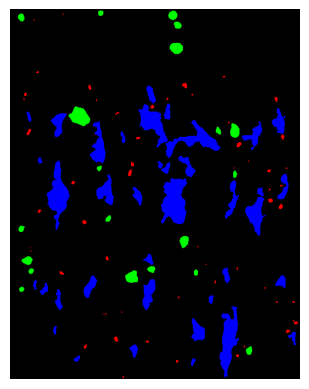

******* Add the labels variable then save the features and labels into csv file *******
labeled_img1 shape (322926,)
annotation shape (642, 503)
the unique labels [0 2 1 4]
the count of the unique labels 0    296780
4     21429
2      3615
1      1102
Name: Labels, dtype: int64


In [19]:
label_image(test_img,test_img_org, test_output_labeled_image_path,test_features_path, test_df)
Y_test_image = test_df["Labels"].values
# Define the independent variables
X_test_image = test_df.drop(labels = ["Labels"], axis=1)

The CLF Random Forest_trained
Y_test_image [0 0 0 ... 0 0 0]
prediction_result [0 0 0 ... 0 0 0]
Accuracy on full image data =  96.978 %
the unique predicted labels [0 1 2 4]
unique predicted class: 0 Count: 291898
unique predicted class: 1 Count: 1259
unique predicted class: 2 Count: 3984
unique predicted class: 4 Count: 25785
Confusion Matrix [[291886     88    207   4599]
 [     0    880    216      6]
 [     0      7   1414   2194]
 [    12    284   2147  18986]]


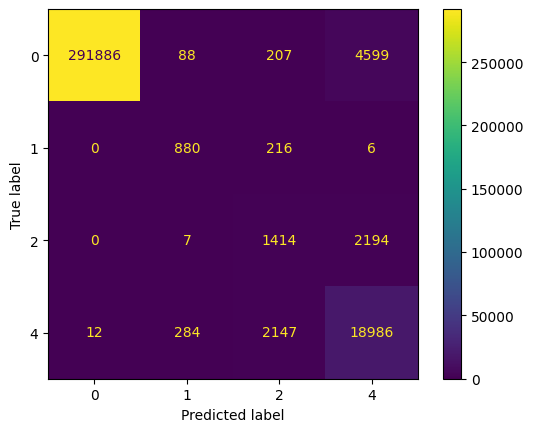

Label  0  accuracy =  0.9835096704629692
Label  1  accuracy =  0.7985480943738656
Label  2  accuracy =  0.39114799446749654
Label  4  accuracy =  0.8859956134210649
img.shape for segmented (642, 503)
test_img_org.shape for predicted image (642, 503, 3)
annotation_value 1
annotation_value 2
annotation_value 3
annotation_value 4
predicted_img shape (642, 503, 3)
The CLF .ipynb_checkpoints


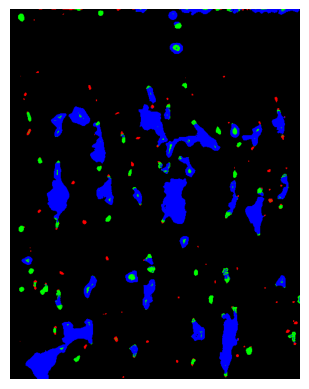

In [20]:
 # extract X from the new image
import os
models_path = "/content/CLF_res"
for model in os.listdir(models_path):  #iterate through each file
  print('The CLF', model)
  #To test the model on future datasets
  # loaded_model = pickle.load(open(filename, 'rb'))
  if (models_path + '/' + model) != '/content/CLF_res/.ipynb_checkpoints':
    loaded_model = pickle.load(open(models_path + '/' + model, 'rb'))
    prediction_result = loaded_model.predict(X_test_image)

    print('Y_test_image',Y_test_image)
    print('prediction_result', prediction_result)

    acc = metrics.accuracy_score(Y_test_image, prediction_result)*100
    print ("Accuracy on full image data = ", round(acc,3), '%')

    unique_values_pred, value_counts_pred = np.unique(prediction_result, return_counts=True)
    print('the unique predicted labels',  unique_values_pred)
    # Display the counts of each unique value
    for value, count in zip(unique_values_pred, value_counts_pred):
        print("unique predicted class:", value, "Count:", count)

    #Confusion Matrix
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    from sklearn import metrics
    confusion_matrix = metrics.confusion_matrix(Y_test_image, prediction_result)
    print('Confusion Matrix',confusion_matrix)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = loaded_model.classes_)
    cm_display.plot()
    plt.show()

    #Print individual accuracy values for each class, based on the confusion matrix
    ind_class_acc = confusion_matrix.diagonal()/confusion_matrix.sum(axis=1)
    for i in range(len(loaded_model.classes_)):
      print("Label ", loaded_model.classes_[i], " accuracy = ", ind_class_acc[i])

    #Right metric is ROC AUC
    #Starting version 0.23.1 you can report this for multilabel problems.
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    from sklearn.metrics import roc_auc_score  #Version 0.23.1 of sklearn

    # #For roc_auc_score in the multiclass case, these must be probability estimates which sum to 1.
    # prob_y_test = loaded_model.predict_proba(X_test_image)
    # print("ROC_AUC score for imbalanced data is:")
    # print(roc_auc_score(Y_test_image, prob_y_test, multi_class='ovr', labels=[0, 1, 2, 3]))

    print('img.shape for segmented',test_img.shape)
    print('test_img_org.shape for predicted image',test_img_org.shape)

    # # Color the pixels belonging to each contour
    colors = {1: (255, 0, 0), 2: (0, 255, 0), 3: (255, 255, 0), 4: (0, 0, 255)}

    segmented = prediction_result.reshape((test_img.shape))

    predicted_img = np.zeros_like(test_img_org)

    for annotation_value, color in colors.items():
      print('annotation_value',annotation_value)
      pixels_of_certain_type = np.argwhere(segmented == annotation_value)
      #print('pixels_of_certain_type',pixels_of_certain_type)
      for x,y in pixels_of_certain_type:
        predicted_img[x, y] = np.array(color)

    plt.imshow(predicted_img)
    plt.axis('off')
    #cv2_imshow(predicted_img)
    print('predicted_img shape', predicted_img.shape)
    plt.imsave('/content/predicted_images/predicted_test_image_{}.jpg'.format(model), predicted_img)
